<a href="https://colab.research.google.com/github/hardik1057/Diabetes_classification/blob/main/DA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

##Diabetes Dataset

In [ ]:
file_path1 = "13pV5aLUUdeJ_BtluVIRzSXGAKikbXh_o"
url1 = f"https://drive.google.com/uc?export=download&id={file_path1}"
data1 = pd.read_csv(url1)
print(data1)

X = data1[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data1['Outcome']

# Standardize the features
scaler = StandardScaler()
scaler.fit(X)
standarized_data = scaler.transform(X)
X = standarized_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

##Naive Bayes on Diabetes Dataset




In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_train = gnb.predict(X_train)
accuracy1 = accuracy_score(y_train, y_pred_train)
print(f'Accuracy of the model during training: {accuracy1}')
y_pred_test = gnb.predict(X_test)
accuracy_nb1 = accuracy_score(y_test, y_pred_test)
print(f'Accuracy of the model during testing: {accuracy_nb1}')
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy of the model during training: 0.7703583061889251
Accuracy of the model during testing: 0.7727272727272727
Confusion Matrix:
[[85 14]
 [21 34]]


##SVM on Diabetes Dataset





In [ ]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
accuracy1 = accuracy_score(y_train, y_pred_train)
print(f'Accuracy of the model during training: {accuracy1}')
y_pred_test = classifier.predict(X_test)
accuracy_svm1 = accuracy_score(y_test, y_pred_test)
print(f'Accuracy of the model during testing: {accuracy_svm1}')
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy of the model during training: 0.7719869706840391
Accuracy of the model during testing: 0.7792207792207793
Confusion Matrix:
[[89 10]
 [24 31]]


##Decision Tree on Diabetes Dataset

In [ ]:
tree_classifier = DecisionTreeClassifier(max_depth=2, criterion='entropy')
tree_classifier.fit(X_train, y_train)
y_pred_train = tree_classifier.predict(X_train)
accuracy1 = accuracy_score(y_train, y_pred_train)
print(f'Accuracy of the model during training: {accuracy1}')
y_pred_test = tree_classifier.predict(X_test)
accuracy_dt1 = accuracy_score(y_test, y_pred_test)
print(f'Accuracy of the model during testing: {accuracy_dt1}')
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy of the model during training: 0.7361563517915309
Accuracy of the model during testing: 0.7337662337662337
Confusion Matrix:
[[77 22]
 [19 36]]


## KNN on Diabetes Dataset

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
accuracy1 = accuracy_score(y_train, y_pred_train)
print(f'Accuracy of the model during training: {accuracy1}')
y_pred_test = knn.predict(X_test)
accuracy_knn1 = accuracy_score(y_test, y_pred_test)
print(f'Accuracy of the model during testing: {accuracy_knn1}')
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy of the model during training: 0.8192182410423453
Accuracy of the model during testing: 0.8051948051948052
Confusion Matrix:
[[90  9]
 [21 34]]


# Random Forest on Diabetes Dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(
    n_estimators=100,  # Use more trees
    max_depth=100,  # Decrease max depth
    min_samples_split=20,  # Increase min samples split
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=5
)

# Fit the classifier and make predictions
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

accuracy_rf1 = accuracy_score(y_test, y_pred_test)
# Print the accuracy score
print(f"Accuracy: {accuracy_rf1}")

# Print the accuracy score on the training set
y_pred_train = clf.predict(X_train)
print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train)}")
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8116883116883117
Training Accuracy: 0.8811074918566775
Confusion Matrix:
[[86 13]
 [16 39]]


##Bar Graph of Accuracy vs Classification Model of Diabetes Dataset

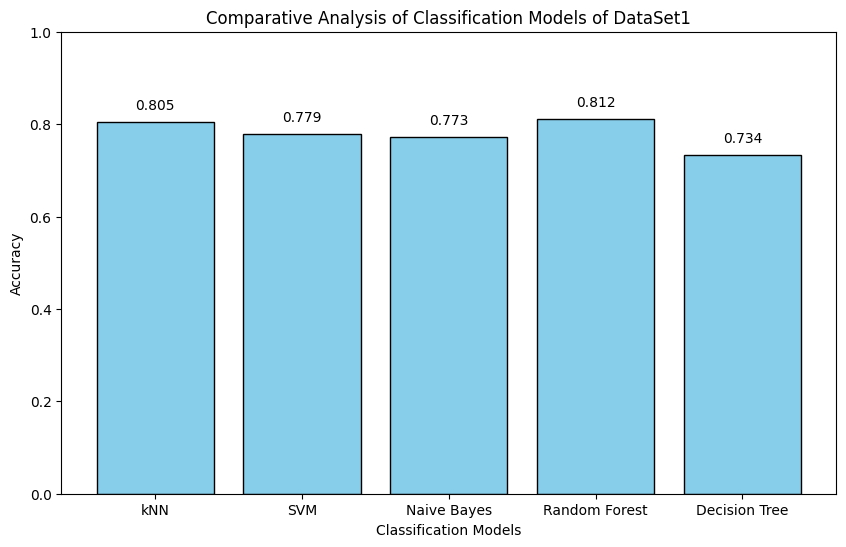

In [ ]:
models = ["kNN", "SVM", "Naive Bayes", "Random Forest", "Decision Tree"]
accuracies = [accuracy_knn1, accuracy_svm1, accuracy_nb1, accuracy_rf1, accuracy_dt1]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue', edgecolor='black')
plt.xlabel("Classification Models")
plt.ylabel("Accuracy")
plt.title("Comparative Analysis of Classification Models of DataSet1")
plt.ylim(0, 1)  # Set y-axis limits (adjust as needed)

# Add labels to each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.3f}", ha='center', va='bottom')

plt.show()

## Diabetes Prediction Dataset


In [ ]:
file_path3 = "1WbaIkPYKzAaP_6_wB9tOkVL6OvFsetFY"
url3 = f"https://drive.google.com/uc?export=download&id={file_path3}"
data3 = pd.read_csv(url3)
print(data3)


# Create an instance of LabelEncoder
lab = LabelEncoder()

# Perform label encoding on the 'my_column' column
data3['gender'] = lab.fit_transform(data3['gender'])
data3['smoking_history'] = lab.fit_transform(data3['smoking_history'])

X = data3.drop(columns=['diabetes'],axis=1)
Y = data3['diabetes']
# Standardize the features
scaler = StandardScaler()
scaler.fit(X)
standarized_data = scaler.transform(X)
X = standarized_data


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(data3)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140        

## Naive Bayes on Diabetes Prediction Dataset




In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_train = gnb.predict(X_train)
accuracy1 = accuracy_score(y_train, y_pred_train)
print(f'Accuracy of the model during training: {accuracy1}')
y_pred_test = gnb.predict(X_test)
accuracy_nb2 = accuracy_score(y_test, y_pred_test)
print(f'Accuracy of the model during testing: {accuracy_nb2}')
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy of the model during training: 0.903
Accuracy of the model during testing: 0.9038
Confusion Matrix:
[[16968  1331]
 [  593  1108]]


## SVM on Diabetes Prediction Dataset

In [ ]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
accuracy1 = accuracy_score(y_train, y_pred_train)
print(f'Accuracy of the model during training: {accuracy1}')
y_pred_test = classifier.predict(X_test)
accuracy_svm2 = accuracy_score(y_test, y_pred_test)
print(f'Accuracy of the model during testing: {accuracy_svm2}')
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy of the model during training: 0.9608
Accuracy of the model during testing: 0.9613
Confusion Matrix:
[[18215    84]
 [  690  1011]]


## Decision Tree on Diabetes Prediction Dataset

In [ ]:
tree_classifier = DecisionTreeClassifier(max_depth=2, criterion='entropy')
tree_classifier.fit(X_train, y_train)
y_pred_train = tree_classifier.predict(X_train)
accuracy1 = accuracy_score(y_train, y_pred_train)
print(f'Accuracy of the model during training: {accuracy1}')
y_pred_test = tree_classifier.predict(X_test)
accuracy_dt2 = accuracy_score(y_test, y_pred_test)
print(f'Accuracy of the model during testing: {accuracy_dt2}')
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy of the model during training: 0.971725
Accuracy of the model during testing: 0.97245
Confusion Matrix:
[[18299     0]
 [  551  1150]]


## KNN on Diabetes Prediction Dataset

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
accuracy1 = accuracy_score(y_train, y_pred_train)
print(f'Accuracy of the model during training: {accuracy1}')
y_pred_test = knn.predict(X_test)
accuracy_knn2 = accuracy_score(y_test, y_pred_test)
print(f'Accuracy of the model during testing: {accuracy_knn2}')
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy of the model during training: 0.96985
Accuracy of the model during testing: 0.9611
Confusion Matrix:
[[18149   150]
 [  628  1073]]


# Random Forest on Diabetes Prediction Dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(
    n_estimators=100,  # Use more trees
    max_depth=None,  # Decrease max depth
    min_samples_split=2,  # Increase min samples split
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=5
)

# Fit the classifier and make predictions
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

accuracy_rf2=accuracy_score(y_test, y_pred_test)
# Print the accuracy score
print(f"Accuracy: {accuracy_rf2}")

# Print the accuracy score on the training set
y_pred_train = clf.predict(X_train)
print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train)}")
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.97055
Training Accuracy: 0.99925
Confusion Matrix:
[[18236    63]
 [  526  1175]]


##Bar Graph of Accuracy vs Classification Model of Diabetes Prediction Dataset


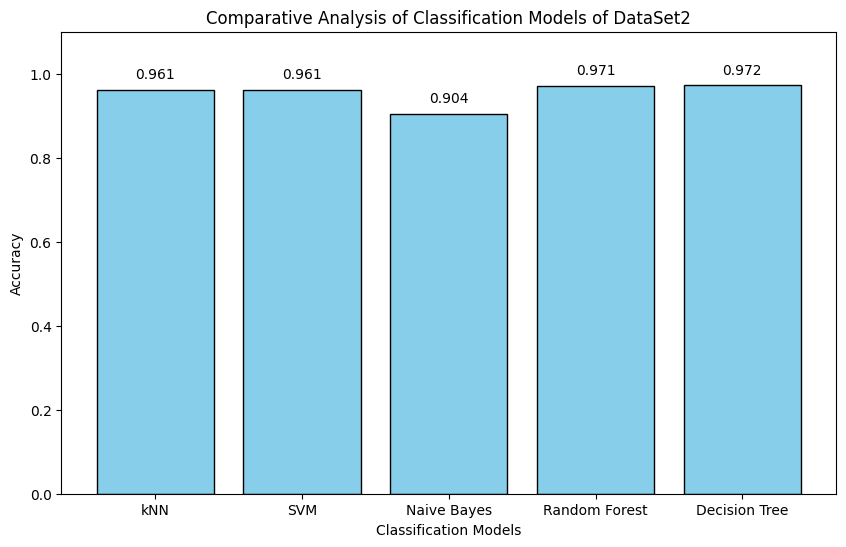

In [ ]:
models = ["kNN", "SVM", "Naive Bayes", "Random Forest", "Decision Tree"]
accuracies = [accuracy_knn2, accuracy_svm2, accuracy_nb2, accuracy_rf2, accuracy_dt2]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue', edgecolor='black')
plt.xlabel("Classification Models")
plt.ylabel("Accuracy")
plt.title("Comparative Analysis of Classification Models of DataSet2")
plt.ylim(0, 1.1)  # Set y-axis limits (adjust as needed)

# Add labels to each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.3f}", ha='center', va='bottom')

plt.show()

## Diabetes Health Indicators Dataset

In [ ]:
file_path4 = "1rrFUSShewclzkPmfd7ZYW3EQyTzZWnLF"
url4 = f"https://drive.google.com/uc?export=download&id={file_path4}"
data4 = pd.read_csv(url4)
print(data4)

X = data4.drop(columns=['Diabetes_012'],axis=1)
Y = data4['Diabetes_012']

# Standardize the features
scaler = StandardScaler()
scaler.fit(X)
standarized_data = scaler.transform(X)
X = standarized_data

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

        Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                  0       1         1          1   40       1       0   
1                  0       0         0          0   25       1       0   
2                  0       1         1          1   28       0       0   
3                  0       1         0          1   27       0       0   
4                  0       1         1          1   24       0       0   
...              ...     ...       ...        ...  ...     ...     ...   
253675             0       1         1          1   45       0       0   
253676             1       1         1          1   18       0       0   
253677             0       0         0          1   28       0       0   
253678             0       1         0          1   23       0       0   
253679             1       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                          0         

##Naive Bayes on Diabetes Health Indicators Dataset

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_train = gnb.predict(X_train)
accuracy1 = accuracy_score(y_train, y_pred_train)
print(f'Accuracy of the model during training: {accuracy1}')
y_pred_test = gnb.predict(X_test)
accuracy_nb3 = accuracy_score(y_test, y_pred_test)
print(f'Accuracy of the model during testing: {accuracy_nb3}')
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy of the model during training: 0.7737848864711447
Accuracy of the model during testing: 0.774538789025544
Confusion Matrix:
[[35267  8404]
 [ 3035  4030]]


##SVM on Diabetes Health Indicators Dataset

In [ ]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, y_train)
y_pred_train = classifier.predict(X_train)
accuracy1 = accuracy_score(y_train, y_pred_train)
print(f'Accuracy of the model during training: {accuracy1}')
y_pred_test = classifier.predict(X_test)
accuracy_svm3 = accuracy_score(y_test, y_pred_test)
print(f'Accuracy of the model during testing: {accuracy_svm3}')
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy of the model during training: 0.8606462866603595
Accuracy of the model during testing: 0.8607497634815515
Confusion Matrix:
[[43671     0]
 [ 7065     0]]


##Decision Tree on Diabetes Health Indicators Dataset

In [ ]:
tree_classifier = DecisionTreeClassifier(max_depth=2, criterion='entropy')
tree_classifier.fit(X_train, y_train)
y_pred_train = tree_classifier.predict(X_train)
accuracy1 = accuracy_score(y_train, y_pred_train)
print(f'Accuracy of the model during training: {accuracy1}')
y_pred_test = tree_classifier.predict(X_test)
accuracy_dt3 = accuracy_score(y_test, y_pred_test)
print(f'Accuracy of the model during testing: {accuracy_dt3}')
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy of the model during training: 0.8606462866603595
Accuracy of the model during testing: 0.8607497634815515
Confusion Matrix:
[[43671     0]
 [ 7065     0]]


##KNN on Diabetes Health Indicators Dataset

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
accuracy1 = accuracy_score(y_train, y_pred_train)
print(f'Accuracy of the model during training: {accuracy1}')
y_pred_test = knn.predict(X_test)
accuracy_knn3 = accuracy_score(y_test, y_pred_test)
print(f'Accuracy of the model during testing: {accuracy_knn3}')
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy of the model during training: 0.8866830258593503
Accuracy of the model during testing: 0.8474061810154525
Confusion Matrix:
[[41536  2135]
 [ 5607  1458]]


# Random Forest on Diabetes Health Indicators Dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(
    n_estimators=100,  # Use more trees
    max_depth=None,  # Decrease max depth
    min_samples_split=2,  # Increase min samples split
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=5
)

# Fit the classifier and make predictions
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

accuracy_rf3=accuracy_score(y_test, y_pred_test)
# Print the accuracy score
print(f"Accuracy: {accuracy_rf3}")

# Print the accuracy score on the training set
y_pred_train = clf.predict(X_train)
print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train)}")
conf_matrix = confusion_matrix(y_test, y_pred_test)
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8590941343424787
Training Accuracy: 0.9943728319142227
Confusion Matrix:
[[42393  1278]
 [ 5871  1194]]


##Bar Graph of Accuracy vs Classification Model of Diabetes Health Indicators Dataset

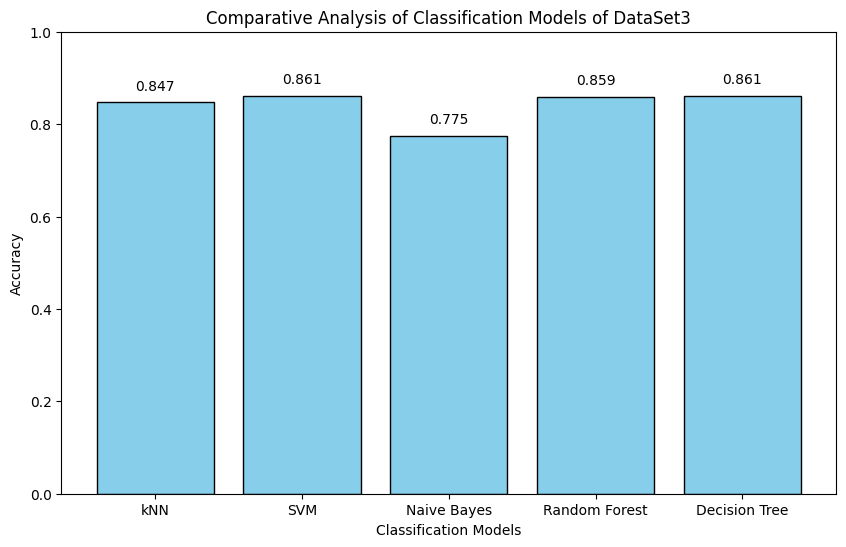

In [ ]:
models = ["kNN", "SVM", "Naive Bayes", "Random Forest", "Decision Tree"]
accuracies = [accuracy_knn3, accuracy_svm3, accuracy_nb3, accuracy_rf3, accuracy_dt3]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue', edgecolor='black')
plt.xlabel("Classification Models")
plt.ylabel("Accuracy")
plt.title("Comparative Analysis of Classification Models of DataSet3")
plt.ylim(0, 1)  # Set y-axis limits (adjust as needed)

# Add labels to each bar
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.3f}", ha='center', va='bottom')

plt.show()

##Summarized

In [ ]:
datasets = ["Diabetes Dataset", "Diabetes Prediction Dataset", "Diabetes Health Indicators Dataset"]
models = ["kNN", "SVM", "Naive Bayes", "Random Forest", "Decision Tree"]
accuracies_A = [accuracy_knn1, accuracy_svm1, accuracy_nb1, accuracy_rf1, accuracy_dt1]  # Accuracy scores for Dataset A
accuracies_B = [accuracy_knn2, accuracy_svm2, accuracy_nb2, accuracy_rf2, accuracy_dt2]  # Accuracy scores for Dataset B
accuracies_C = [accuracy_knn3, accuracy_svm3, accuracy_nb3, accuracy_rf3, accuracy_dt3]  # Accuracy scores for Dataset C

# Create a DataFrame with models as columns and datasets as rows
comparison_df = pd.DataFrame({
    "Model": models,
    datasets[0]: accuracies_A,
    datasets[1]: accuracies_B,
    datasets[2]: accuracies_C
})

# Print the final comparison table
print(comparison_df)


           Model  Diabetes Dataset  Diabetes Prediction Dataset  \
0            kNN          0.805195                      0.96110   
1            SVM          0.779221                      0.96130   
2    Naive Bayes          0.772727                      0.90380   
3  Random Forest          0.811688                      0.97055   
4  Decision Tree          0.733766                      0.97245   

   Diabetes Health Indicators Dataset  
0                            0.847406  
1                            0.860750  
2                            0.774539  
3                            0.859094  
4                            0.860750  
